In [6]:
import matplotlib.pyplot as plt
import csv
import numpy

import tensorflow as tf
#sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
#from keras import backend as K
#K.set_session(sess)

from keras.preprocessing.image import  array_to_img, img_to_array, ImageDataGenerator

from keras.datasets import cifar10
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

from PIL import Image

In [7]:
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 43
# Количество эпох для обучения
nb_epoch = 5
# Размер изображений
img_rows, img_cols = 48, 48
# Количество каналов в изображении: RGB
img_channels = 3

In [4]:
def load_img(path):
    with Image.open(path) as img:
        img = img.resize((img_rows, img_cols))
        imgarray = numpy.asarray(img)
        #mask = numpy.array([[1,1,1]])
        #imgarray = imgarray * mask
        #print(imgarray.shape)
        #imgarray = imgarray.reshape((img_rows, img_cols, img_channels))
        #print(imgarray)
        return imgarray

        
def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-' + format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        gtReader.__next__() # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            imgarray = load_img(prefix + row[0])
            images.append(imgarray) # the 1th column is the filename             
#             images.append(plt.imread(prefix + row[0]))
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

In [25]:
trainImages, trainLabels = readTrafficSigns('C:/Users/tonym/YandexDisk/python/CRT_testing_work/GTSRB/Training')

# вариант с генератором 

In [25]:
X_train = numpy.asarray(trainImages)/255
Y_train = np_utils.to_categorical(trainLabels, nb_classes)
print(len(trainLabels), len(trainImages))

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
datagen.fit(X_train)

26640 26640


# Модель

In [5]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(100, (7, 7), padding='same', input_shape=(img_rows, img_cols, img_channels), activation='relu'))

# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

# Второй сверточный слой
model.add(Conv2D(150, (4, 4), activation='relu', padding='same'))

# второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))

# # Слой регуляризации Dropout
# model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(250, (4, 4), padding='same', activation='relu'))

# второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))


# # Четвертый сверточный слой
# model.add(Conv2D(64, (3, 3), activation='relu'))
# # Второй слой подвыборки
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # Слой регуляризации Dropout
# model.add(Dropout(0.25))
# # Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(300, activation='relu'))

#model.add(Dense(1024, activation='softmax'))

# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# обучение без генератора

In [ ]:
model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

# С генератором

In [15]:
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=batch_size),
              epochs=2,steps_per_epoch = 100,
              verbose=2)

Epoch 1/2
7s - loss: 0.0762 - acc: 0.9759
Epoch 2/2
7s - loss: 0.1075 - acc: 0.9684


# сохранение 

In [21]:
model_json = model.to_json()
json_file = open("C:/Users/tonym/YandexDisk/python/CRT_testing_work/all_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("C:/Users/tonym/YandexDisk/python/CRT_testing_work/all_model.h5")

In [21]:
json_file = open("C:/Users/tonym/YandexDisk/python/CRT_testing_work/all_model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель
model = model_from_json(loaded_model_json)
# Загружаем сохраненные веса в модель
model.load_weights("C:/Users/tonym/YandexDisk/python/CRT_testing_work/all_model.h5")
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# старое тестирование

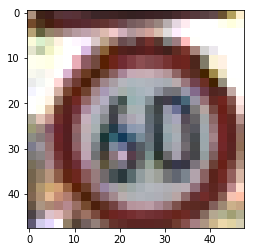

In [12]:
img = load_img("C:\\Users\\tonym\\YandexDisk\\python\\CRT_testing_work\\TrainIJCNN2013\\03\\00007.ppm")
plt.imshow(img)
plt.show()
X = numpy.array([img/256])
pre = model.predict(X)
#print(pre)

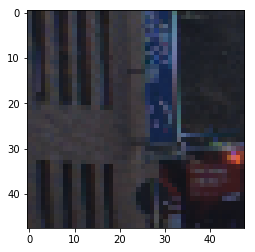

In [13]:
#загружаем в классификатор мусор 
img = load_img("C:\\Users\\tonym\\YandexDisk\\python\\CRT_testing_work\\TrainIJCNN2013\\bad.ppm")
plt.imshow(img)
plt.show()
X = numpy.array([img/256])
pre = model.predict(X)
#print(pre)

In [ ]:
fimages = [] # images
fimages.append(img_to_array(img)) # the 1th column is the filename     
X = preprocess_dataset(numpy.asarray(fimages))
show_oneYpic(X[0])
pre = model.predict(X)
print(numpy.argmax(pre))
# pre = np_utils.categorical_probas_to_classes(pre)
# print(pre[0])

In [ ]:
scores = model.evaluate(X_train, Y_train, verbose=0)
print(scores)

In [ ]:
print("Точность работы сети на обучающей выборке: %.2f%%" % (scores[1]*100))

# тест

In [9]:
X_test = [] # images
Y_test = [] # corresponding labels
for i in range(43):
    prefix = 'C:/Users/tonym/YandexDisk/python/CRT_testing_work/TrainIJCNN2013/' + format(i, '02d') + '/' # subdirectory for class
    j = 0
    while True:
        try:  
            imgarray = load_img(prefix + format(j,"05d") +'.ppm')
            if j==0:
                #plt.imshow(imgarray)
                #plt.show()
            X_test.append(imgarray) # the 1th column is the filename
            Y_test.append(i)
        except IOError as e:
            break
        j+=1

# print(X_test)
X_test = numpy.asarray(X_test)
X_test = X_test.astype('float32')
X_test /= 255

IndentationError: expected an indented block (<ipython-input-9-368da3563301>, line 12)

In [22]:
Y_t = np_utils.to_categorical(Y_test, nb_classes)
scores = model.evaluate(X_test, Y_t, verbose=0)
print("Точность работы загруженной сети на тестовых данных: %.2f%%" % (scores[1]*100))
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Точность работы загруженной сети на обучающей выборке: %.2f%%" % (scores[1]*100))

NameError: name 'Y_test' is not defined

In [19]:
model.fit(X_test, Y_t,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 767 samples, validate on 86 samples
Epoch 1/5
2s - loss: 0.4197 - acc: 0.8879 - val_loss: 0.4537 - val_acc: 0.8372
Epoch 2/5
1s - loss: 0.0704 - acc: 0.9909 - val_loss: 0.5516 - val_acc: 0.7791
Epoch 3/5
1s - loss: 0.0259 - acc: 0.9961 - val_loss: 0.6539 - val_acc: 0.7791
Epoch 4/5
1s - loss: 0.0125 - acc: 0.9987 - val_loss: 0.6341 - val_acc: 0.8023
Epoch 5/5
1s - loss: 0.0057 - acc: 1.0000 - val_loss: 0.6339 - val_acc: 0.7907


1050 570 - max 9.802935e-01
1045 570 - class 34


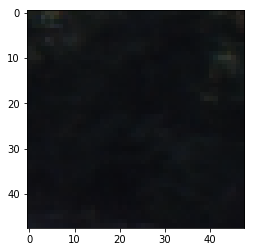

In [14]:
img_w, img_h = 1360, 800 
step = 5
with Image.open("C:/Users/tonym/YandexDisk/python/CRT_testing_work/TestIJCNN2013/TestIJCNN2013Download/00060.ppm") as img:
    img = img.resize((img_w, img_h))
    imgarray = numpy.asarray(img)

x_, y_ = step, step
maxclass = 0.
for x in range(step, img_w - img_rows - 1, step):
    for y in range(step, img_h - img_cols - 1, step):
        cadr = imgarray[y:(y + img_cols), x:(x + img_rows), :]
        pre = model.predict(numpy.array([cadr]))
        m = numpy.argmax(pre[0])
        #print(pre[0])
        #print("%e --- %e" % (pre[0, m], maxclass))
        if (pre[0, m] > maxclass) and (pre[0, m]<0.99):
            #print(pre[0])
            #print("%e --- %e" % (pre[0, m], maxclass))
            if numpy.min(pre[0]) > 0:
                x_ = x
                y_ = y
                maxclass = pre[0, m]

print("%d %d - max %e" % (x_, y_, maxclass))
cl = 0
for x in range(x_ - step, x_ + step):
    for y in range(y_ - step, y_ + step):
        cadr = imgarray[y:(y + img_cols), x:(x + img_rows), :]
        pre = model.predict(numpy.array([cadr]))
        m = numpy.argmax(pre[0])
        if pre[0, m] > maxclass:
            x_ = x
            y_ = y
            maxclass = pre[0, m]
            cl = m

print("%d %d - class %d" % (x_, y_, cl))

plt.imshow(imgarray[y_:(y_ + img_cols), x_:(x_ + img_rows), :])
plt.show()

In [23]:
def readTrafficSigns_test(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    prefix = rootpath
    gtFile = open(prefix + 'GT-final_test.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    gtReader.__next__() # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        imgarray = load_img(prefix + row[0])
        images.append(imgarray) # the 1th column is the filename             
#         images.append(plt.imread(prefix + row[0]))
        labels.append(row[7]) # the 8th column is the label
    gtFile.close()
    return images, labels

tImages, tLabels = readTrafficSigns_test('C:/Users/tonym/YandexDisk/python/CRT_testing_work/GTSRB_Final_Test_Images/GTSRB/Final_Test/Images/')
X_t = numpy.asarray(tImages)/255
Y_t = np_utils.to_categorical(tLabels, nb_classes)
print(len(tLabels), len(tImages))
scores = model.evaluate(X_t, Y_t, verbose=0)
print("Точность работы загруженной сети на тестовых данных: %.2f%%" % (scores[1]*100))

12630 12630
Точность работы загруженной сети на тестовых данных: 91.78%
